In [1]:
import pandas as pd
import uproot
import cupy as cp
import boost_histogram as bh
import time

In [2]:
def no_DN (frame):
    
    i = frame.index[0][0]
    new_frame = frame.loc[(frame['isDN'].values == False) & (frame['hitTime'].values < 300)]
    return new_frame.loc[i]

In [3]:
def first (frame):
    frame_sort = frame.sort_values(['hitTime'])
    frame_first = frame_sort.drop_duplicates(subset='pmtID', keep='first')
    frame_last = frame_first.sort_values('hitTime', ascending=False)
    return frame_last

In [4]:
def normal_ft(ev):
    
    mi = ev['hitTime'].min()
    
    a = ev['nHits'].values
    b = ev['pmtID'].values
    c = ev['hitTime'] - mi
    data = {'nHits': a, 'pmtID': b, 'hitTime': c}
        
    norm = pd.DataFrame(data)
    return norm

In [5]:
def save_hist (data, info, n, pre, b):
    
    dst_dir = '/home/centos/prova_E/E8_50/'
    
    hist = bh.Histogram(bh.axis.Regular(50, 0, 300))
    for i in info['evtID']:
        name = pre+str(i)+'_'+str(b)+'.npy'
        ev = data.pandas.df(entrystart=i, entrystop=i+1)
        try:
            ev_noDN = no_DN(ev)
        except:
            print(i, ': solo dark noise')
            continue
        ev_first = first(ev_noDN)
        ev_norm = normal_ft(ev_first)
        ev_time= ev_norm['hitTime'].values
        hist.fill(ev_time)
        array = hist.to_numpy()
        time = array[0]
        
        cp.save(dst_dir + name, time)
        hist.reset()

In [6]:
def call_all (file, a):
    
    data_file = uproot.open(file)
    INFO = data_file['true_info'].pandas.df()
    DATA = data_file["lpmt_hits"]
    
    if file.startswith('/home/centos/FlatComplete'):
        name = 'pos'
        
        INFO_E8 = INFO.loc[(INFO['E'] > 8) & (INFO['E'] < 9) ]
        
    elif file.startswith('/home/centos/ElectronDataset'):
        name = 'el'
        
        INFO_E8 = INFO.loc[(INFO['E'] > 9) & (INFO['E'] < 10) ]
        
    else:
        print('file non riconosciuto')
        
    save_hist(DATA, INFO_E8, 8, name, a)

In [7]:
P0 = "/home/centos/FlatComplete/eplus_hits_dn_0.root"
P1 = "/home/centos/FlatComplete/eplus_hits_dn_1.root"
P2 = "/home/centos/FlatComplete/eplus_hits_dn_2.root"
P3 = "/home/centos/FlatComplete/eplus_hits_dn_3.root"
P4 = "/home/centos/FlatComplete/eplus_hits_dn_4.root"
P5 = "/home/centos/FlatComplete/eplus_hits_dn_5.root"
P6 = "/home/centos/FlatComplete/eplus_hits_dn_6.root"
P7 = "/home/centos/FlatComplete/eplus_hits_dn_7.root"
P8 = "/home/centos/FlatComplete/eplus_hits_dn_8.root"
P9 = "/home/centos/FlatComplete/eplus_hits_dn_9.root"

In [8]:
E0 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_0.root"
E1 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_1.root"
E2 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_2.root"
E3 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_3.root"
E4 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_4.root"
E5 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_5.root"
E6 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_6.root"
E7 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_7.root"
E8 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_8.root"
E9 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_9.root"

In [9]:
call_all(P0, 0)
call_all(E0, 0)
time.strftime("%H") +":"+ time.strftime("%M")

'14:35'

In [10]:
call_all(P1, 1)
call_all(E1, 1)
time.strftime("%H") +":"+ time.strftime("%M")

'15:03'

In [11]:
call_all(P2, 2)
call_all(E2, 2)
time.strftime("%H") +":"+ time.strftime("%M")

'15:31'

In [12]:
call_all(P3, 3)
call_all(E3, 3)
time.strftime("%H") +":"+ time.strftime("%M")

'15:59'

In [13]:
call_all(P4, 4)
call_all(E4, 4)
time.strftime("%H") +":"+ time.strftime("%M")

'16:26'

In [14]:
call_all(P5, 5)
call_all(E5, 5)
time.strftime("%H") +":"+ time.strftime("%M")

'16:54'

In [15]:
call_all(P6, 6)
call_all(E6, 6)
time.strftime("%H") +":"+ time.strftime("%M")

'17:21'

In [16]:
call_all(P7, 7)
call_all(E7, 7)
time.strftime("%H") +":"+ time.strftime("%M")

'17:50'

In [17]:
call_all(P8, 8)
call_all(E8, 8)
time.strftime("%H") +":"+ time.strftime("%M")

'18:18'

In [18]:
call_all(P9, 9)
call_all(E9, 9)
time.strftime("%H") +":"+ time.strftime("%M")

'18:46'

# -----------------------------------------

In [19]:
import os
import cupy as cp
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [21]:
folder = 'prova_E/E8_50/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

200057


In [22]:
E8 = np.empty((200057, 50, 1), dtype=cp.float64)
labels_E8 = np.zeros(200057)
folder = 'prova_E/E8_50/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E8[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (50,1))
    E8[i] = array
    i += 1

<BarContainer object of 50 artists>

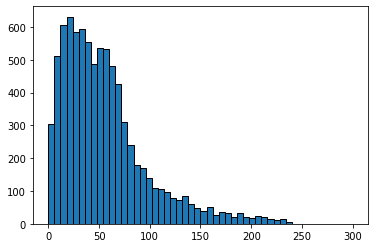

In [26]:
x = np.linspace(0, 300, 51)
plt.bar(x[:-1], E8[0].flatten(), width=np.diff(x), ec='black', align='edge')

In [27]:
E8 = E8/E8.max()

In [28]:
from sklearn.model_selection import train_test_split
E8X_train, E8X_test, E8Y_train, E8Y_test = train_test_split(E8 , labels_E8 ,test_size=0.2)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 1)))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [33]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [34]:
history = model.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 40s 251us/step - loss: 0.7182 - accuracy: 0.5036 - val_loss: 0.6924 - val_accuracy: 0.5226
Epoch 2/20
160045/160045 [==============================] - 38s 239us/step - loss: 0.6929 - accuracy: 0.5136 - val_loss: 0.6914 - val_accuracy: 0.5190
Epoch 3/20
160045/160045 [==============================] - 38s 238us/step - loss: 0.6918 - accuracy: 0.5223 - val_loss: 0.6901 - val_accuracy: 0.5383
Epoch 4/20
160045/160045 [==============================] - 39s 241us/step - loss: 0.6909 - accuracy: 0.5256 - val_loss: 0.6885 - val_accuracy: 0.5359
Epoch 5/20
160045/160045 [==============================] - 38s 237us/step - loss: 0.6898 - accuracy: 0.5317 - val_loss: 0.6874 - val_accuracy: 0.5542
Epoch 6/20
160045/160045 [==============================] - 37s 234us/step - loss: 0.6899 - accuracy: 0.5326 - val_loss: 0.6865 - val_accuracy: 0.5556
Epoch 7/20
160045/160045 [=================

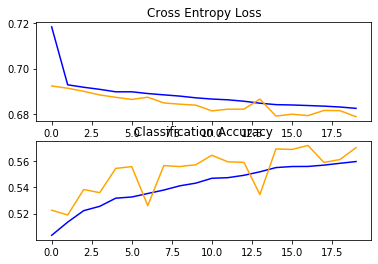

In [35]:
summarize_diagnostics(history)

# kernel size = 9

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model2 = Sequential()
model2.add(Conv1D(32, 9, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 1)))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv1D(64, 9, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv1D(128, 9, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

In [41]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [42]:
history2 = model2.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 45s 282us/step - loss: 0.7053 - accuracy: 0.5126 - val_loss: 0.6917 - val_accuracy: 0.5174
Epoch 2/20
160045/160045 [==============================] - 45s 282us/step - loss: 0.6909 - accuracy: 0.5267 - val_loss: 0.6870 - val_accuracy: 0.5424
Epoch 3/20
160045/160045 [==============================] - 43s 267us/step - loss: 0.6896 - accuracy: 0.5321 - val_loss: 0.6878 - val_accuracy: 0.5386
Epoch 4/20
160045/160045 [==============================] - 43s 270us/step - loss: 0.6881 - accuracy: 0.5393 - val_loss: 0.6844 - val_accuracy: 0.5533
Epoch 5/20
160045/160045 [==============================] - 44s 276us/step - loss: 0.6867 - accuracy: 0.5451 - val_loss: 0.6874 - val_accuracy: 0.5331
Epoch 6/20
160045/160045 [==============================] - 46s 289us/step - loss: 0.6854 - accuracy: 0.5489 - val_loss: 0.6903 - val_accuracy: 0.5267
Epoch 7/20
160045/160045 [=================

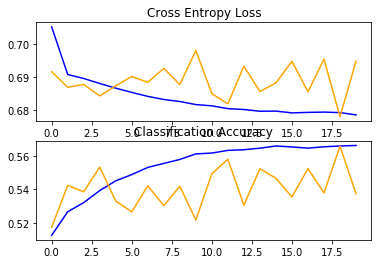

In [43]:
summarize_diagnostics(history2)

# kernel size = 15

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model3 = Sequential()
model3.add(Conv1D(32, 15, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 1)))
model3.add(MaxPooling1D(2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Conv1D(64, 15, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling1D(2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Conv1D(128, 15, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling1D(2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

In [47]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [48]:
history3 = model3.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 48s 299us/step - loss: 0.7053 - accuracy: 0.5167 - val_loss: 0.6880 - val_accuracy: 0.5407
Epoch 2/20
160045/160045 [==============================] - 46s 288us/step - loss: 0.6894 - accuracy: 0.5334 - val_loss: 0.7035 - val_accuracy: 0.5024
Epoch 3/20
160045/160045 [==============================] - 45s 283us/step - loss: 0.6875 - accuracy: 0.5420 - val_loss: 0.6865 - val_accuracy: 0.5349
Epoch 4/20
160045/160045 [==============================] - 46s 286us/step - loss: 0.6857 - accuracy: 0.5487 - val_loss: 0.6867 - val_accuracy: 0.5402
Epoch 5/20
160045/160045 [==============================] - 46s 288us/step - loss: 0.6837 - accuracy: 0.5549 - val_loss: 0.6849 - val_accuracy: 0.5481
Epoch 6/20
160045/160045 [==============================] - 46s 290us/step - loss: 0.6825 - accuracy: 0.5582 - val_loss: 0.6912 - val_accuracy: 0.5293
Epoch 7/20
160045/160045 [=================

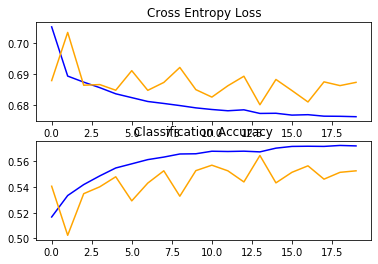

In [49]:
summarize_diagnostics(history3)

# kernel size = 25

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model4 = Sequential()
model4.add(Conv1D(32, 25, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 1)))
model4.add(MaxPooling1D(2))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Conv1D(64, 25, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Conv1D(128, 25, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))

In [51]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [52]:
history4 = model4.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 53s 331us/step - loss: 0.7002 - accuracy: 0.5192 - val_loss: 0.6906 - val_accuracy: 0.5166
Epoch 2/20
160045/160045 [==============================] - 52s 323us/step - loss: 0.6893 - accuracy: 0.5332 - val_loss: 0.6883 - val_accuracy: 0.5260
Epoch 3/20
160045/160045 [==============================] - 52s 322us/step - loss: 0.6869 - accuracy: 0.5434 - val_loss: 0.6902 - val_accuracy: 0.5288
Epoch 4/20
160045/160045 [==============================] - 52s 327us/step - loss: 0.6848 - accuracy: 0.5510 - val_loss: 0.6840 - val_accuracy: 0.5439
Epoch 5/20
160045/160045 [==============================] - 56s 349us/step - loss: 0.6834 - accuracy: 0.5559 - val_loss: 0.6846 - val_accuracy: 0.5429
Epoch 6/20
160045/160045 [==============================] - 51s 318us/step - loss: 0.6817 - accuracy: 0.5598 - val_loss: 0.6886 - val_accuracy: 0.5491
Epoch 7/20
160045/160045 [=================

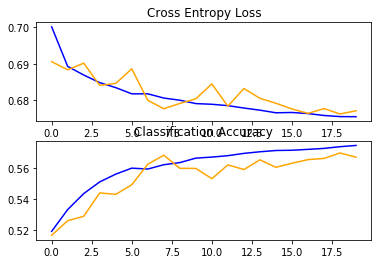

In [53]:
summarize_diagnostics(history4)

# kernel size = 30

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model6 = Sequential()
model6.add(Conv1D(32, 30, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 1)))
model6.add(MaxPooling1D(2))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Conv1D(64, 30, activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(MaxPooling1D(2))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Conv1D(128, 30, activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(MaxPooling1D(2))
model6.add(BatchNormalization())
model6.add(Dropout(0.2))
model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(Dropout(0.2))
model6.add(Dense(1, activation='sigmoid'))

In [59]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [60]:
history6 = model6.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 56s 348us/step - loss: 0.7012 - accuracy: 0.5176 - val_loss: 0.6926 - val_accuracy: 0.5147
Epoch 2/20
160045/160045 [==============================] - 54s 339us/step - loss: 0.6886 - accuracy: 0.5384 - val_loss: 0.6881 - val_accuracy: 0.5332
Epoch 3/20
160045/160045 [==============================] - 58s 361us/step - loss: 0.6863 - accuracy: 0.5457 - val_loss: 0.6912 - val_accuracy: 0.5390
Epoch 4/20
160045/160045 [==============================] - 55s 346us/step - loss: 0.6840 - accuracy: 0.5538 - val_loss: 0.6820 - val_accuracy: 0.5548
Epoch 5/20
160045/160045 [==============================] - 53s 328us/step - loss: 0.6829 - accuracy: 0.5568 - val_loss: 0.7023 - val_accuracy: 0.5245
Epoch 6/20
160045/160045 [==============================] - 54s 339us/step - loss: 0.6822 - accuracy: 0.5599 - val_loss: 0.6859 - val_accuracy: 0.5458
Epoch 7/20
160045/160045 [=================

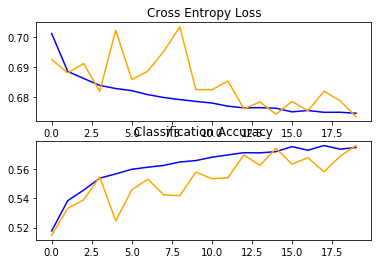

In [61]:
summarize_diagnostics(history6)

# kernel size = 50

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model5 = Sequential()
model5.add(Conv1D(32, 50, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 1)))
model5.add(MaxPooling1D(2))
model5.add(BatchNormalization())
model5.add(Conv1D(64, 50, activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(MaxPooling1D(2))
model5.add(BatchNormalization())
model5.add(Conv1D(128, 50, activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(MaxPooling1D(2))
model5.add(BatchNormalization())
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(Dropout(0.2))
model5.add(Dense(1, activation='sigmoid'))

In [77]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [78]:
history5 = model5.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 97s 604us/step - loss: 0.6929 - accuracy: 0.5464 - val_loss: 0.6794 - val_accuracy: 0.5652
Epoch 2/20
160045/160045 [==============================] - 94s 587us/step - loss: 0.6785 - accuracy: 0.5678 - val_loss: 0.6746 - val_accuracy: 0.5722
Epoch 3/20
160045/160045 [==============================] - 94s 589us/step - loss: 0.6759 - accuracy: 0.5719 - val_loss: 0.6736 - val_accuracy: 0.5763
Epoch 4/20
160045/160045 [==============================] - 94s 589us/step - loss: 0.6740 - accuracy: 0.5764 - val_loss: 0.6743 - val_accuracy: 0.5739
Epoch 5/20
160045/160045 [==============================] - 93s 581us/step - loss: 0.6726 - accuracy: 0.5785 - val_loss: 0.6726 - val_accuracy: 0.5773
Epoch 6/20
160045/160045 [==============================] - 91s 568us/step - loss: 0.6719 - accuracy: 0.5793 - val_loss: 0.6732 - val_accuracy: 0.5737
Epoch 7/20
160045/160045 [=================

In [ ]:
# 57.41

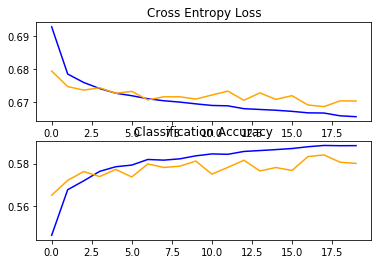

In [79]:
summarize_diagnostics(history5)

In [62]:
model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 50, 32)            1632      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 25, 32)            0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 25, 32)            128       
_________________________________________________________________
dropout_29 (Dropout)         (None, 25, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 25, 64)            102464    
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 12, 64)            0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 12, 64)           

In [68]:
model7 = Sequential()
#model1.add(Input(shape=(21,1)))
model7.add(Flatten(input_shape=(50,1)))
model7.add(BatchNormalization())
model7.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model7.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model7.add(Dense(1, activation='sigmoid'))

In [69]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model7.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [70]:
history7 = model7.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 8s 47us/step - loss: 0.6896 - accuracy: 0.5389 - val_loss: 0.6872 - val_accuracy: 0.5465
Epoch 2/20
160045/160045 [==============================] - 6s 35us/step - loss: 0.6848 - accuracy: 0.5531 - val_loss: 0.6834 - val_accuracy: 0.5554
Epoch 3/20
160045/160045 [==============================] - 5s 31us/step - loss: 0.6812 - accuracy: 0.5611 - val_loss: 0.6809 - val_accuracy: 0.5630
Epoch 4/20
160045/160045 [==============================] - 8s 51us/step - loss: 0.6793 - accuracy: 0.5667 - val_loss: 0.6792 - val_accuracy: 0.5674
Epoch 5/20
160045/160045 [==============================] - 7s 44us/step - loss: 0.6779 - accuracy: 0.5682 - val_loss: 0.6782 - val_accuracy: 0.5674
Epoch 6/20
160045/160045 [==============================] - 5s 33us/step - loss: 0.6770 - accuracy: 0.5698 - val_loss: 0.6776 - val_accuracy: 0.5685
Epoch 7/20
160045/160045 [=============================

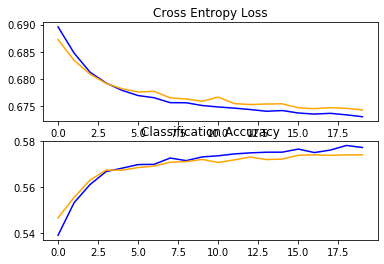

In [71]:
summarize_diagnostics(history7)

In [86]:
E8X_train.shape

(160045, 50, 1)

In [95]:
model8 = Sequential()
#model1.add(Input(shape=(21,1)))
model8.add(Conv1D(2, 50, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 1)))
model8.add(MaxPooling1D(2))
model8.add(BatchNormalization())
model8.add(Flatten())
model8.add(Dense(25, activation='relu', kernel_initializer='he_uniform'))
model8.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model8.add(Dense(1, activation='sigmoid'))

In [96]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model8.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [97]:
history8 = model8.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 160045 samples, validate on 40012 samples
Epoch 1/20
160045/160045 [==============================] - 19s 118us/step - loss: 0.7030 - accuracy: 0.5141 - val_loss: 0.6910 - val_accuracy: 0.5292
Epoch 2/20
160045/160045 [==============================] - 19s 117us/step - loss: 0.6896 - accuracy: 0.5336 - val_loss: 0.6890 - val_accuracy: 0.5381
Epoch 3/20
160045/160045 [==============================] - 18s 113us/step - loss: 0.6866 - accuracy: 0.5466 - val_loss: 0.6853 - val_accuracy: 0.5531
Epoch 4/20
160045/160045 [==============================] - 19s 119us/step - loss: 0.6841 - accuracy: 0.5526 - val_loss: 0.6824 - val_accuracy: 0.5588
Epoch 5/20
160045/160045 [==============================] - 19s 119us/step - loss: 0.6824 - accuracy: 0.5574 - val_loss: 0.6808 - val_accuracy: 0.5627
Epoch 6/20
160045/160045 [==============================] - 19s 121us/step - loss: 0.6810 - accuracy: 0.5600 - val_loss: 0.6796 - val_accuracy: 0.5630
Epoch 7/20
160045/160045 [=================

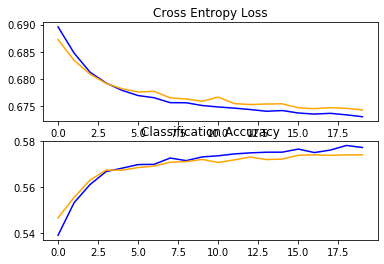

In [98]:
summarize_diagnostics(history7)